The two most popular classification objectives are:

    binary:logistic - binary classification (the target contains only two classes, i.e., cat or dog)

    multi:softprob - multi-class classification (more than two classes in the target, i.e., apple/orange/banana)


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings

## Columns definitions

**start_days** is number of days from the first session

**created_date** is a date of the first session of a contact

a **session** is a number of pageviews during a 30min windows

which means if you stop navigating for 30min and start again it will be a second session

In [2]:
target = "paying" # It is what we try to predict

# a file was generated for 'session_59d'
df = pd.read_csv("/vagrant/ai_random_forest_py/contacts/202402070946/segments.csv", low_memory=False) # returns DataFrame

# del df["created_date"]
# del df["id"]

# 1 if an entity is in a segment at the end of a period
# 0 (zero) if an entity is not in a segment at the end of a period
# 0 (zero) if an entity has never been in a segment

# Viewing the top 5 rows
df.head()

,created_date,id,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,2019-06-18,1,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2019-06-18,2,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-06-18,3,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-06-18,4,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-06-18,5,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
del df["created_date"]
del df["id"]

df.head()

,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Create a list of the feature column's names


# print(df.shape[1] - 2)
features = df.columns[:(df.shape[1] - 1)]


# View features
print(f'Features: {features}')

df.head()

Features: Index(['segm_1', 'segm_2', 'segm_3', 'segm_4', 'segm_5', 'segm_6', 'segm_7',
       'segm_8', 'segm_9', 'segm_10',
       ...
       'segm_209', 'segm_210', 'segm_211', 'segm_212', 'segm_213', 'segm_214',
       'segm_215', 'segm_216', 'segm_217', 'segm_218'],
      dtype='object', length=218)


,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#from sklearn.model_selection import train_test_split

# Split the data
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
#x_train, x_test, y_train, y_test = train_test_split(df, df['paying'], test_size=0.3, random_state = 2020, stratify = df['paying'])

In [6]:
print('data: ', df.shape[0])
print('Paying True: ', df[df['paying'] == True].shape[0])
print('Paying False: ', df[df['paying'] == False].shape[0])


data:  2096
Paying True:  36
Paying False:  2060


The positive label considered as the minority class is Paying


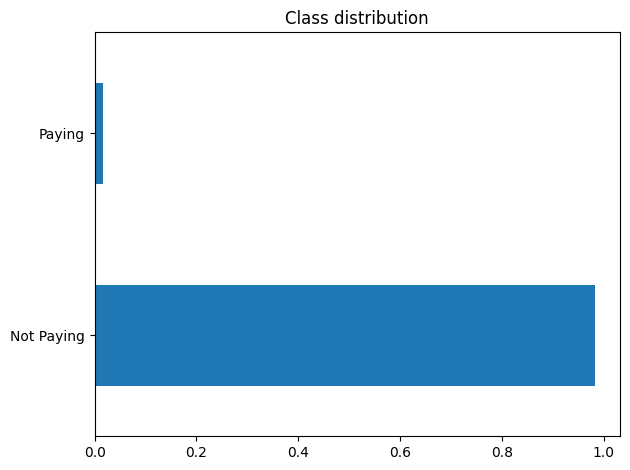

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

y_unbalances = df['paying'].to_numpy().astype('object')

y_unbalances[y_unbalances == 0] = 'Not Paying'
y_unbalances[y_unbalances == 1] = 'Paying'



class_distribution = pd.Series(y_unbalances).value_counts(normalize=True)

ax = class_distribution.plot.barh()
ax.set_title("Class distribution")

pos_label = class_distribution.idxmin()
plt.tight_layout()
print(f"The positive label considered as the minority class is {pos_label}")

We have **Unbalanced Data**

An unbalanced dataset is one in which the target variable has more observations in one specific class than the others.


[SMOTE doc](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)


In [8]:
# pip install imblearn
from imblearn.over_sampling import SMOTE

method = SMOTE(k_neighbors = 5,
              sampling_strategy = 'minority')


x_new, y_new = method.fit_resample(df[features], df['paying'])


The positive label considered as the minority class is Not Paying


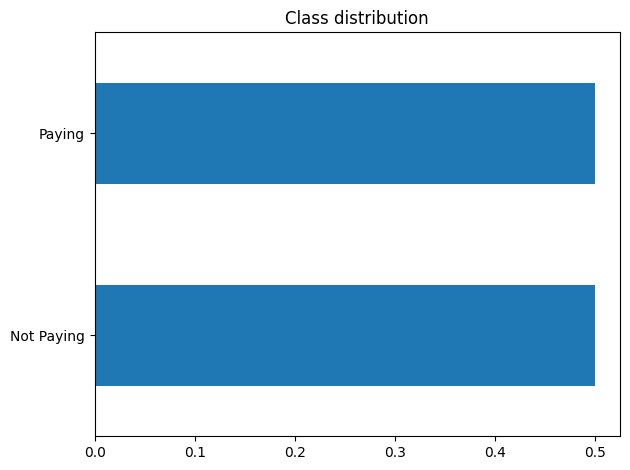

In [9]:
y_smote = y_new.to_numpy().astype('object')

y_smote[y_smote == 0] = 'Not Paying'
y_smote[y_smote == 1] = 'Paying'

class_distribution = pd.Series(y_smote).value_counts(normalize=True)

ax = class_distribution.plot.barh()
ax.set_title("Class distribution")

pos_label = class_distribution.idxmin()
plt.tight_layout()
print(f"The positive label considered as the minority class is {pos_label}")

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state = 2020, stratify = y_new)


x_train = x_train[features]
x_test = x_test[features]

x_train

,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_209,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218
1501,0,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3606,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
291,0,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3181,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3366,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3402,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

y_train

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [12]:
x_train

,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_209,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218
1501,0,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3606,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
291,0,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3181,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3366,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3402,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import xgboost as xgb

# Create classification matrices
dtrain_clf = xgb.DMatrix(x_train, label=y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(x_test, label=y_test, enable_categorical=True)

print('y_train lenght', len(y_train))
print('label:', dtrain_clf.get_label())

print('len label:', len(dtrain_clf.get_label()))

print('the number of columns (features)', dtrain_clf.num_col())

print('the number of rows', dtrain_clf.num_row())

y_train lenght 2884
label: [0. 1. 0. ... 0. 1. 0.]
len label: 2884
the number of columns (features) 218
the number of rows 2884


In [14]:
# https://xgboost.readthedocs.io/en/latest/python/python_intro.html#scikit-learn-interface
# https://xgboost.readthedocs.io/en/latest/python/sklearn_estimator.html

# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=5)

# Fit the model, test sets are used for early stopping.
clf.fit(x_train, y_train, eval_set=[(x_test, y_test)])

[0]	validation_0-logloss:0.47370
[1]	validation_0-logloss:0.33506
[2]	validation_0-logloss:0.24927
[3]	validation_0-logloss:0.19200
[4]	validation_0-logloss:0.15515
[5]	validation_0-logloss:0.12973
[6]	validation_0-logloss:0.10753
[7]	validation_0-logloss:0.09119
[8]	validation_0-logloss:0.07793
[9]	validation_0-logloss:0.06659
[10]	validation_0-logloss:0.06048
[11]	validation_0-logloss:0.05609
[12]	validation_0-logloss:0.05269
[13]	validation_0-logloss:0.04967
[14]	validation_0-logloss:0.04548
[15]	validation_0-logloss:0.04367
[16]	validation_0-logloss:0.04191
[17]	validation_0-logloss:0.04119
[18]	validation_0-logloss:0.03958
[19]	validation_0-logloss:0.03814
[20]	validation_0-logloss:0.03764
[21]	validation_0-logloss:0.03739
[22]	validation_0-logloss:0.03637
[23]	validation_0-logloss:0.03596
[24]	validation_0-logloss:0.03557
[25]	validation_0-logloss:0.03515
[26]	validation_0-logloss:0.03483
[27]	validation_0-logloss:0.03465
[28]	validation_0-logloss:0.03473
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
y_pred = clf.predict(x_test)
print(len(y_pred))
print(len(y_test.reshape(-1)))


1236
1236


### R^2 (coefficient of determination) regression score function.

In [16]:
from sklearn.metrics import r2_score

y_test = y_test.reshape(-1)

# sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
print('R^2: ', r2_score(y_test, y_pred))

R^2:  0.9773462783171522


In [17]:
from sklearn.metrics import recall_score

display(pd.crosstab(y_test.astype(bool), y_pred.astype(bool), rownames = ['Actual Paying'], colnames = ['Predicted Paying']))

Predicted Paying,False,True
Actual Paying,,
False,613,5
True,2,616
